In [39]:
from pdb import line_prefix

from matplotlib.lines import lineStyles
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-kearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


ERROR: Could not find a version that satisfies the requirement scikit-kearn (from versions: none)
ERROR: No matching distribution found for scikit-kearn


In [78]:
df = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx',sheet_name='Annual Planted',skiprows=1)
list_of_states = set(df['State'])

In [79]:
df.columns

Index(['Year', 'Period', 'Geo Level', 'State', 'COTTON, PIMA - ACRES PLANTED',
       'COTTON, UPLAND - ACRES PLANTED', 'COTTON - ACRES PLANTED',
       'abandonment pct PIMA', 'abandonment pct UPLAND',
       'abandonment pct total', 'abandonment pct PIMA.1',
       'abandonment pct UPLAND.1', 'abandonment pct total.1',
       'COTTON, PIMA - ACRES HARVESTED', 'COTTON, UPLAND - ACRES HARVESTED',
       'COTTON - ACRES HARVESTED',
       'COTTON, PIMA - YIELD, MEASURED IN LB / ACRE',
       'COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE',
       'COTTON - YIELD, MEASURED IN LB / ACRE',
       'COTTON, PIMA - PRODUCTION, MEASURED IN 480 LB BALES',
       'COTTON, UPLAND - PRODUCTION, MEASURED IN 480 LB BALES',
       'COTTON - PRODUCTION, MEASURED IN 480 LB BALES'],
      dtype='object')

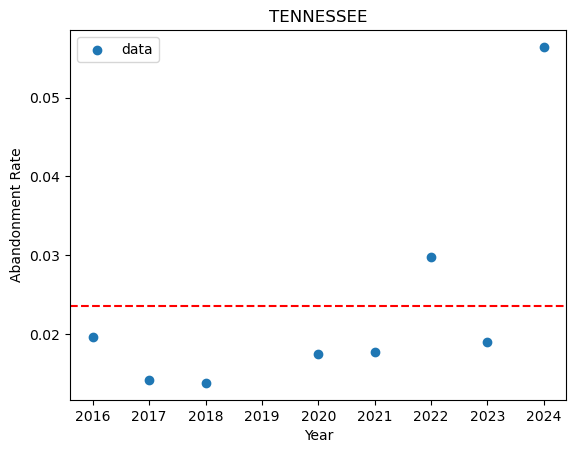

  → Prediction for 2025 upland: 0.023489498763474698



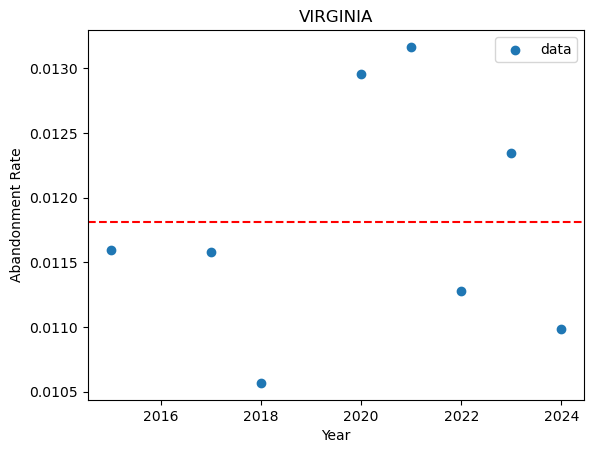

  → Prediction for 2025 upland: 0.01180962500770344



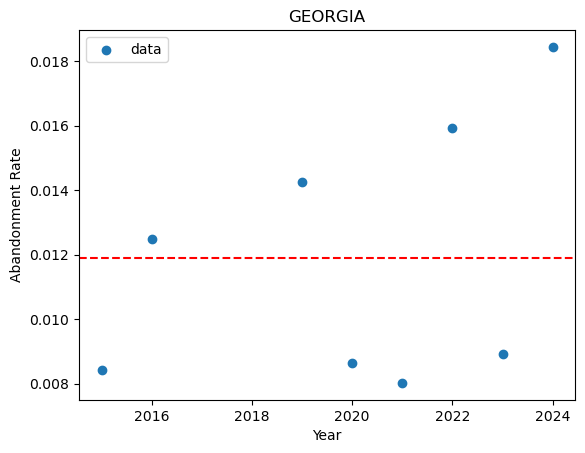

  → Prediction for 2025 upland: 0.011886279573713993



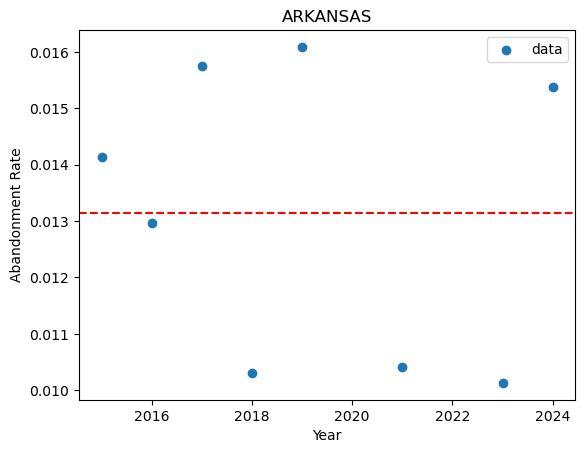

  → Prediction for 2025 upland: 0.013146629259122841



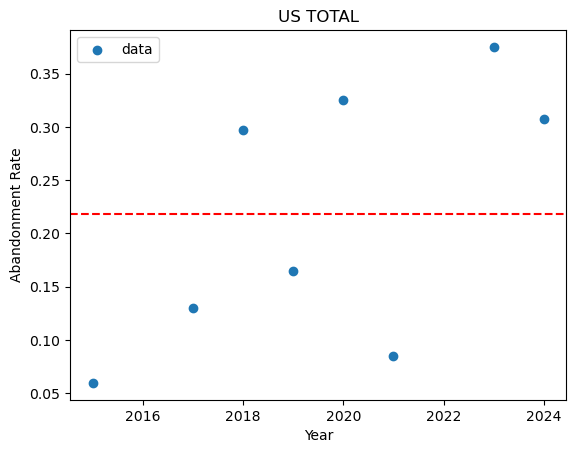

  → Prediction for 2025 upland: 0.21802858537416675



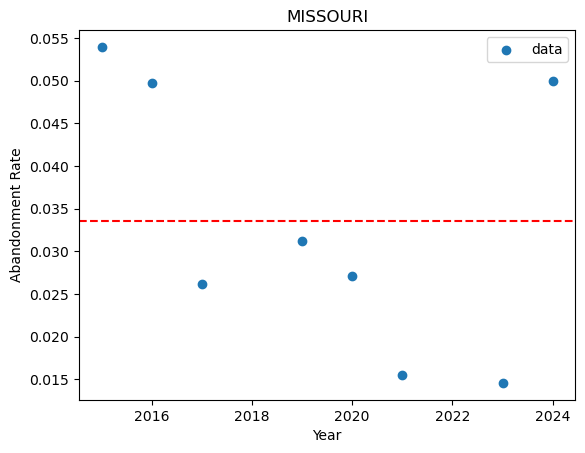

  → Prediction for 2025 upland: 0.03352928732881742



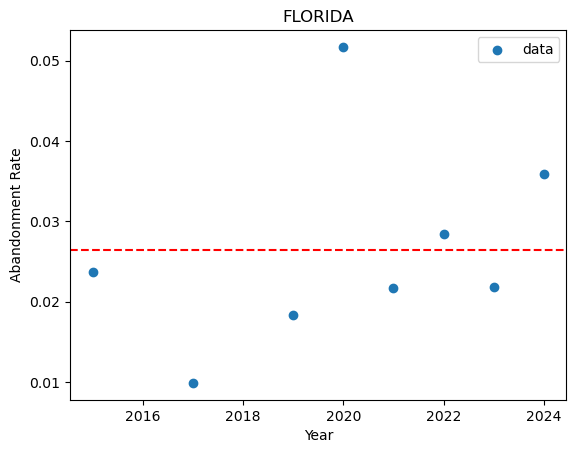

  → Prediction for 2025 upland: 0.026432874879575657



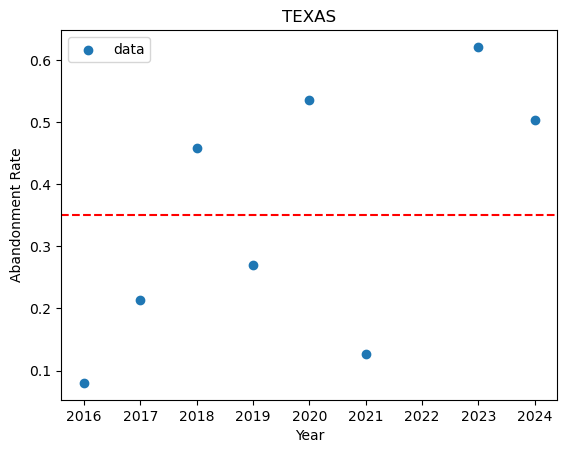

  → Prediction for 2025 upland: 0.35128988395548355



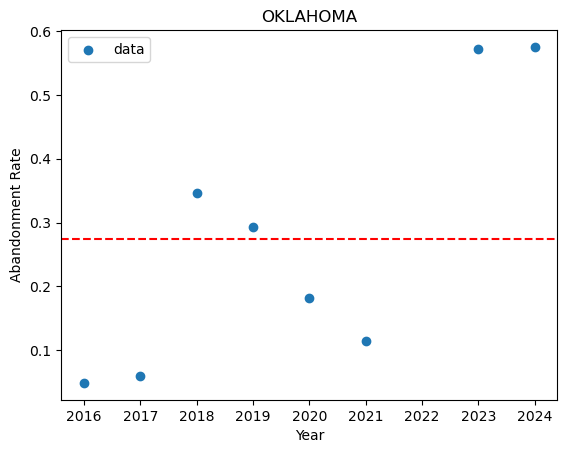

  → Prediction for 2025 upland: 0.27390664083000404



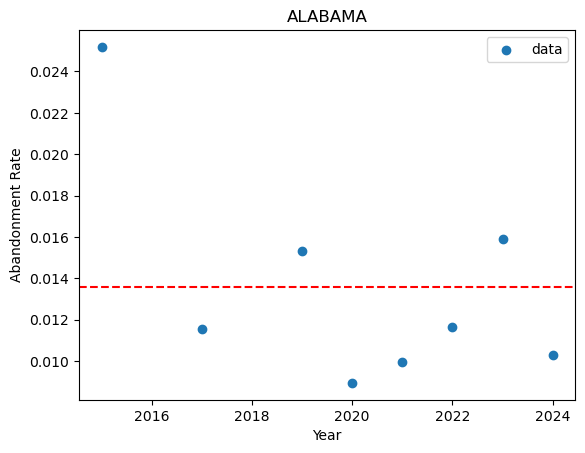

  → Prediction for 2025 upland: 0.013598424487796898



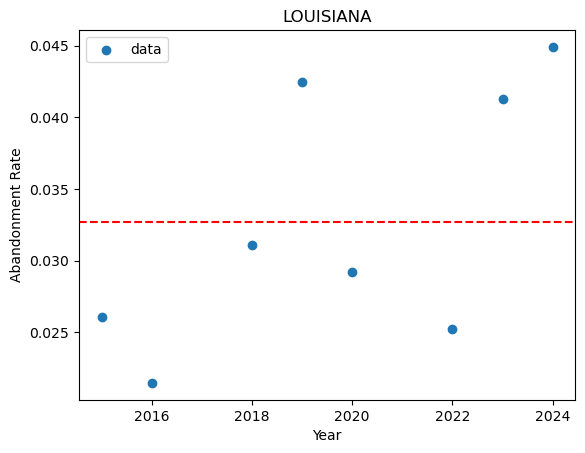

  → Prediction for 2025 upland: 0.032716944708472306



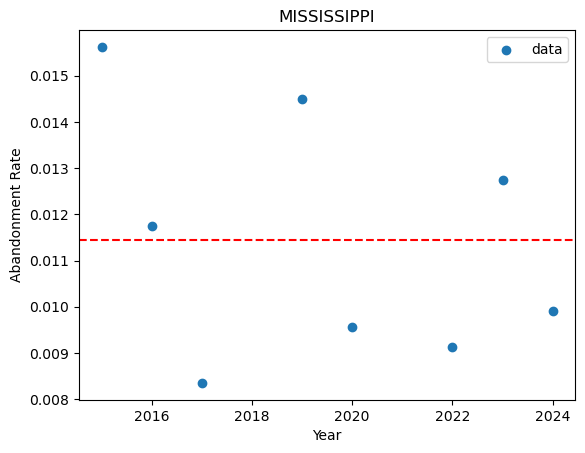

  → Prediction for 2025 upland: 0.01144255798109342



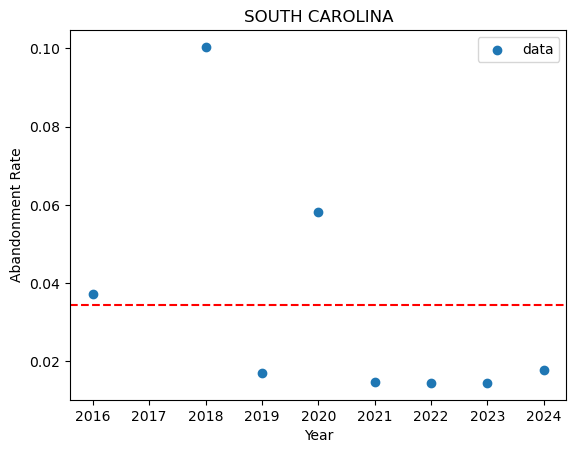

  → Prediction for 2025 upland: 0.03428520683695345



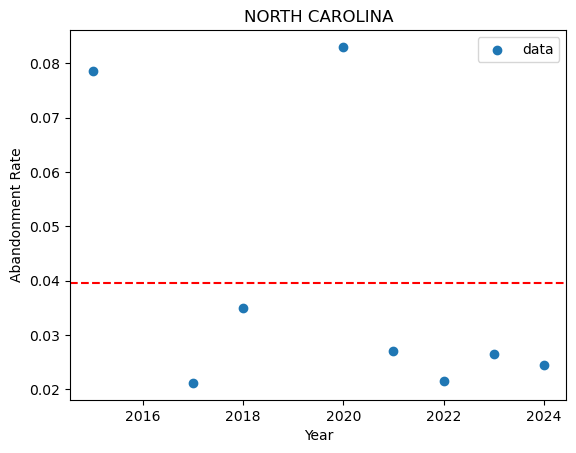

  → Prediction for 2025 upland: 0.03965348804239352



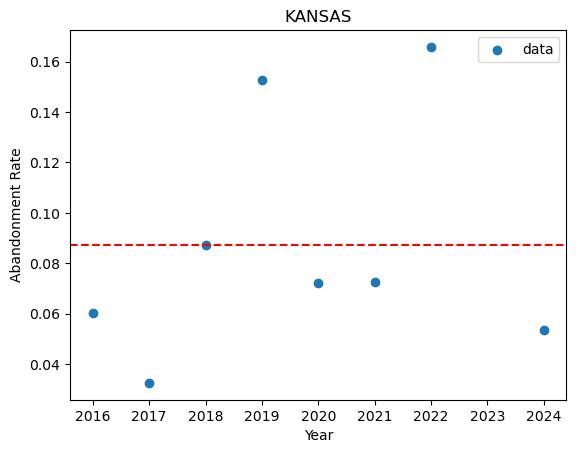

  → Prediction for 2025 upland: 0.08710266700815002



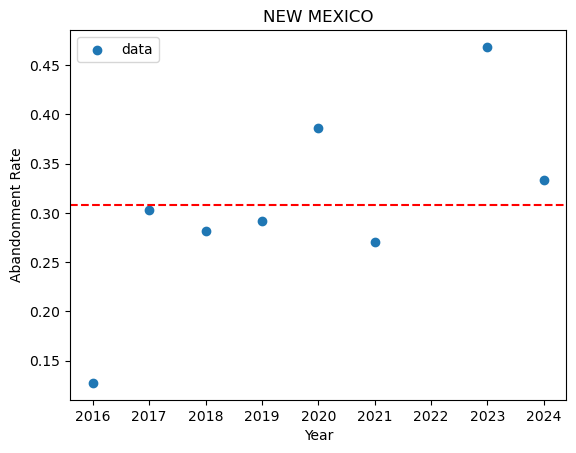

  → Prediction for 2025 upland: 0.3078475508356075



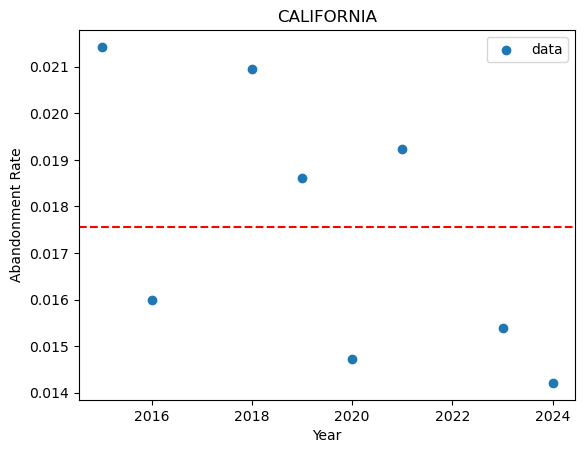

  → Prediction for 2025 upland: 0.017564707895993042



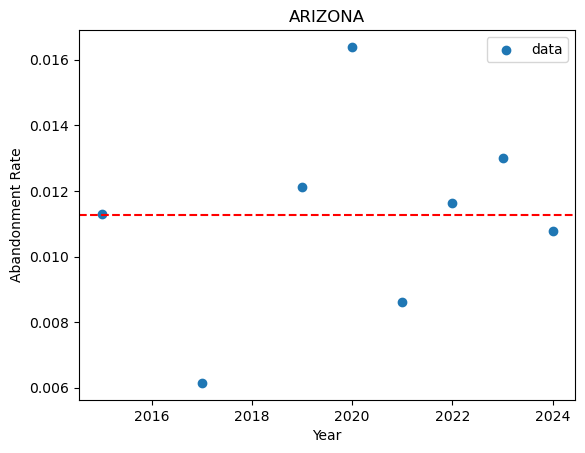

  → Prediction for 2025 upland: 0.011250334310022939



In [119]:
listofabdrate = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values(by=['Year'],ascending=True)
    y = state_df['abandonment pct UPLAND']
    x = state_df['Year']
    
    lower, upper = y.quantile([0.05, 0.95])
    mask      = y.between(lower, upper)
    y      =  y[mask]
    x = x[mask]
    y = y.values
    #plt.scatter(x, y)
    #plt.title(states)
    #plt.show()
    # Fit a linear model (degree=1)


    # Compute R²
    y_pred = y.mean()


    # Plot
    plt.figure()
    plt.scatter(x, y, label='data')
    plt.title(f"{state}")
    plt.xlabel("Year")
    plt.ylabel("Abandonment Rate")
    plt.legend()
    plt.axhline(y_pred, color = 'r', linestyle = '--')
    plt.show()

    # 2025 prediction
    pred_2025 = y_pred
    print(f"  → Prediction for 2025 upland: {pred_2025}\n")
    listofabdrate.append({state:pred_2025})

listofabdrate = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values(by=['Year'],ascending=True)
    x = state_df['Year'].sort_values(ascending=True)
    y = state_df['abandonment pct UPLAND']
    
    
    lower, upper = y.quantile([0.05, 0.95])
    mask      = y.between(lower, upper)
    x, y      = x[mask], y[mask]

    x = x.values
    y = y.values
    #plt.scatter(x, y)
    #plt.title(states)
    #plt.show()
    # Fit a linear model (degree=1)
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state}  →  R² = {r2:.4f},   coeffs = {coeffs}")

    # Build a smooth curve for plotting
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure()
    plt.scatter(x, y, label='data')
    plt.plot(x_line, y_line, label='linear fit')
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Year")
    plt.ylabel("abdrate")
    plt.legend()
    plt.show()

    # 2025 prediction
    pred_2025 = model(2025)
    print(f"  → Prediction for 2025 upland: {pred_2025}\n")
    listofabdrate.append({state:pred_2025})

TENNESSEE  →  R² = 0.0869,   coeffs = [ 6.60000e+00 -1.22468e+04]


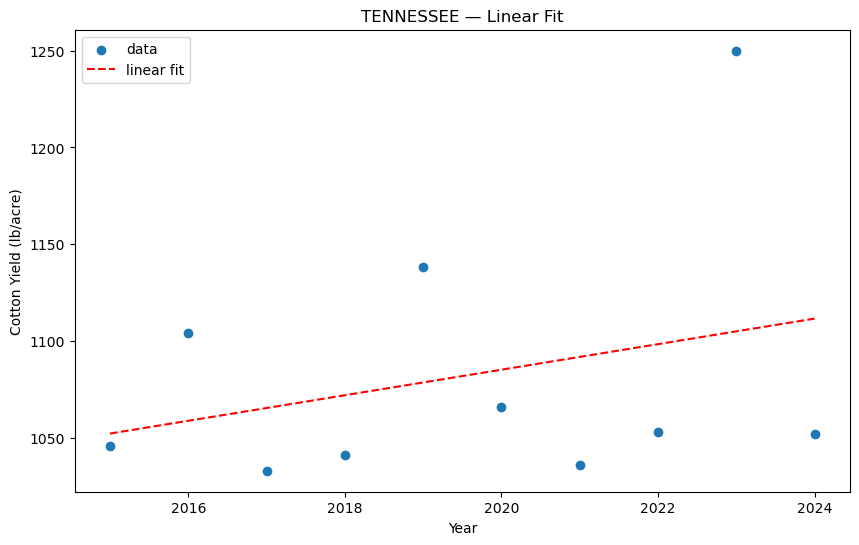

  → Prediction for 2025 upland: 1118.2

VIRGINIA  →  R² = 0.4153,   coeffs = [ 3.89575758e+01 -7.76844242e+04]


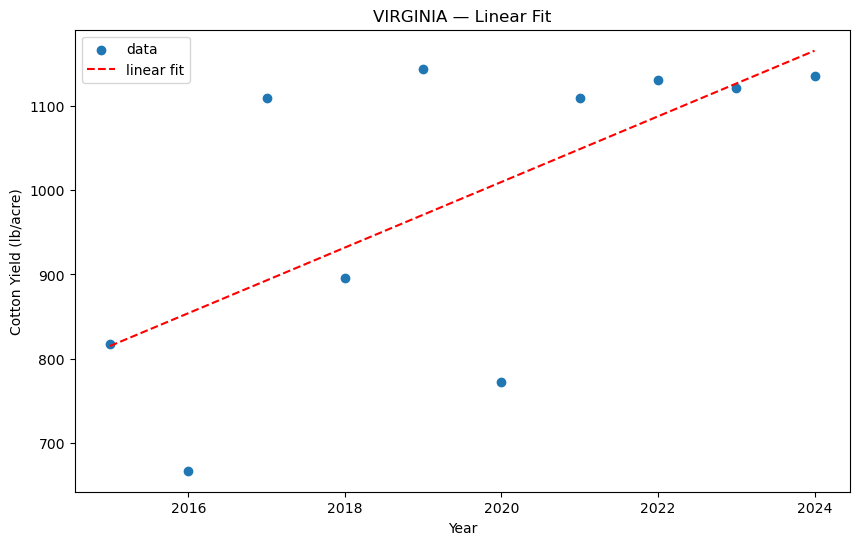

  → Prediction for 2025 upland: 1204.7

GEORGIA  →  R² = 0.0256,   coeffs = [ 4.15151515e+00 -7.48448485e+03]


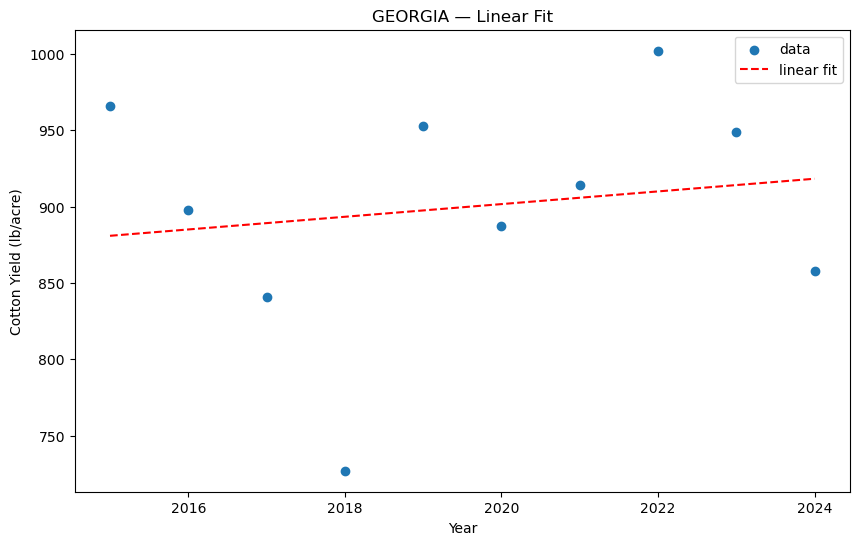

  → Prediction for 2025 upland: 922.3

ARKANSAS  →  R² = 0.8330,   coeffs = [ 2.53333333e+01 -4.99692667e+04]


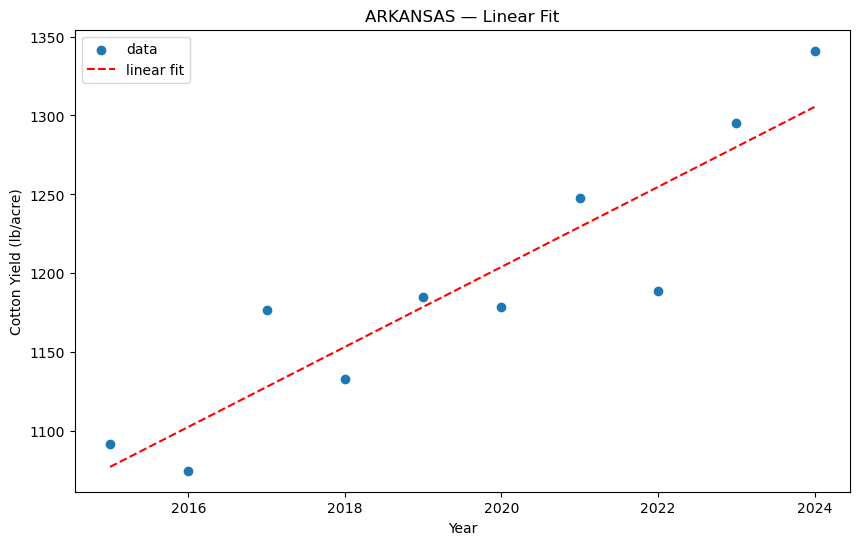

  → Prediction for 2025 upland: 1330.7

US TOTAL  →  R² = 0.2776,   coeffs = [ 9.20606061e+00 -1.77349394e+04]


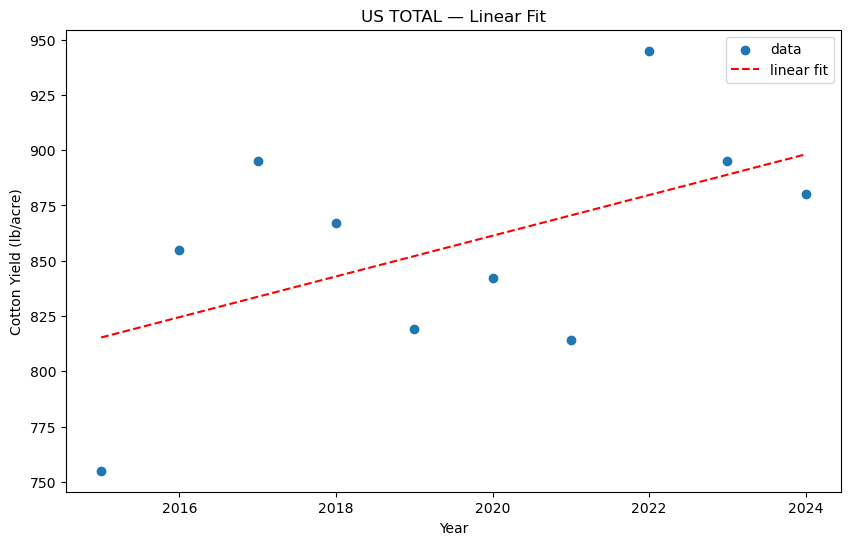

  → Prediction for 2025 upland: 907.3

MISSOURI  →  R² = 0.4454,   coeffs = [ 2.50848485e+01 -4.94367515e+04]


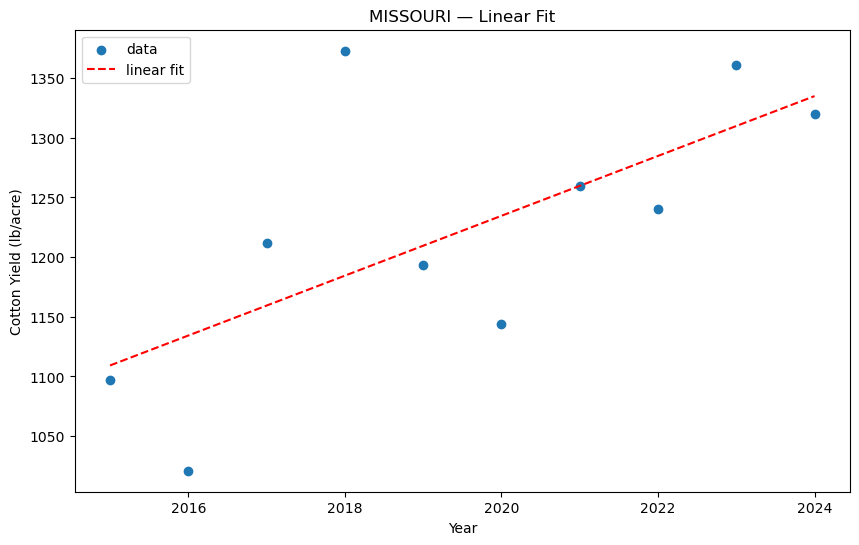

  → Prediction for 2025 upland: 1360.1

FLORIDA  →  R² = 0.2345,   coeffs = [-2.33393939e+01  4.78582061e+04]


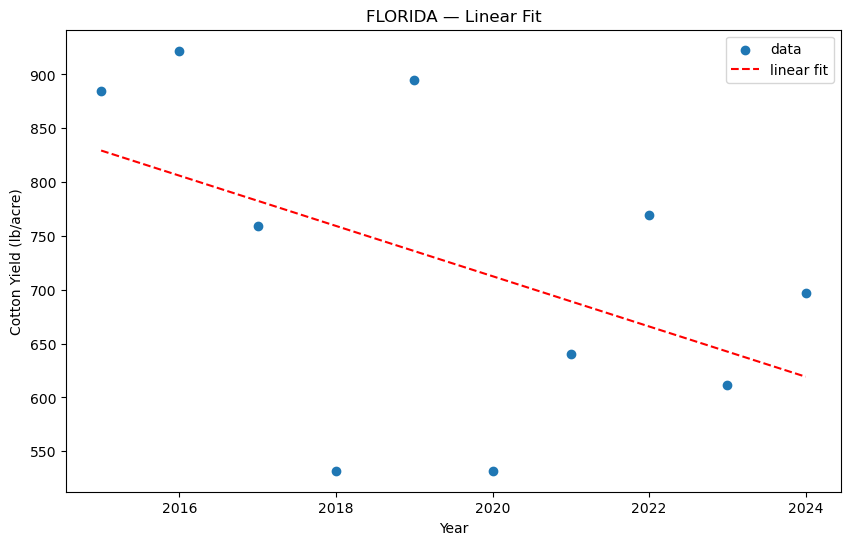

  → Prediction for 2025 upland: 595.9

TEXAS  →  R² = 0.0729,   coeffs = [-6.75757576e+00  1.43378242e+04]


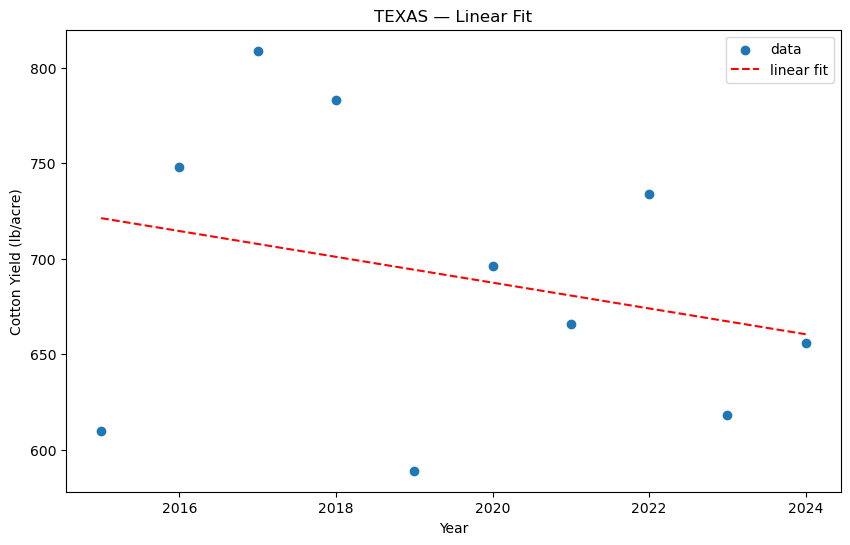

  → Prediction for 2025 upland: 653.7

OKLAHOMA  →  R² = 0.5637,   coeffs = [-3.35333333e+01  6.84766667e+04]


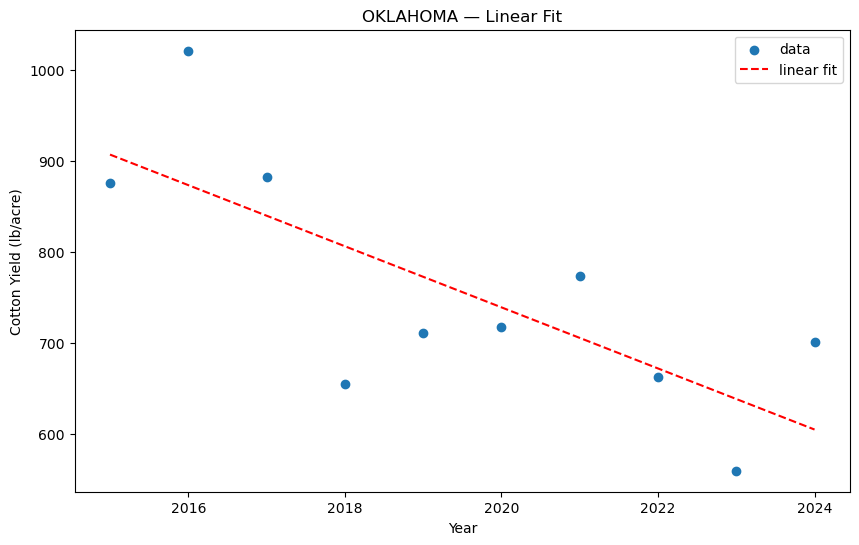

  → Prediction for 2025 upland: 571.7

ALABAMA  →  R² = 0.0714,   coeffs = [-5.55151515e+00  1.20958848e+04]


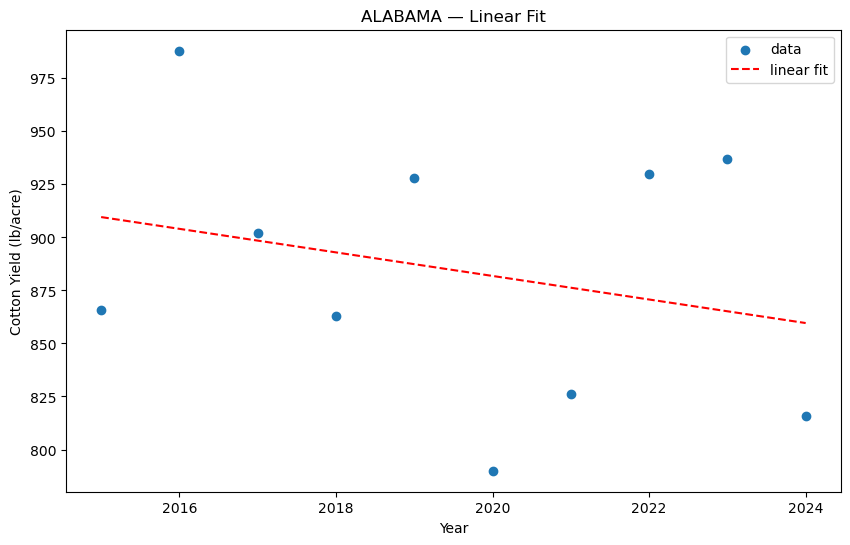

  → Prediction for 2025 upland: 854.1

LOUISIANA  →  R² = 0.1217,   coeffs = [ 1.02848485e+01 -1.98107515e+04]


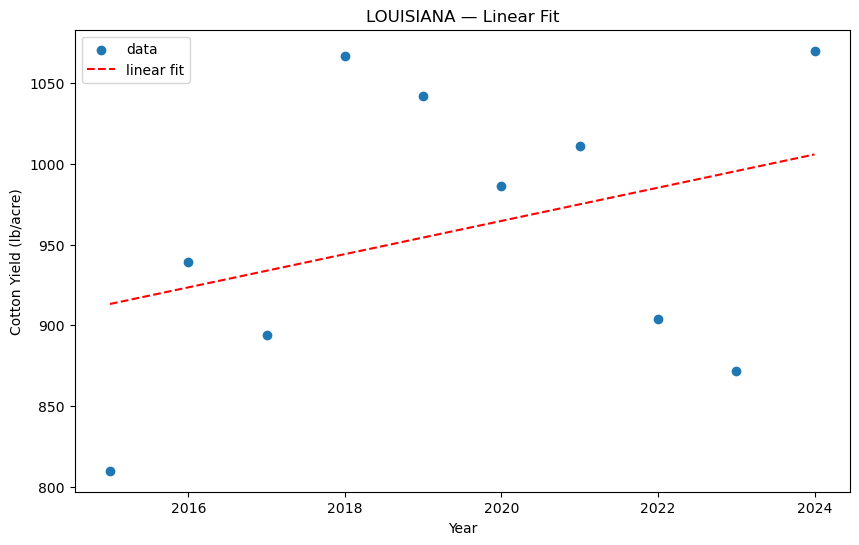

  → Prediction for 2025 upland: 1016.1

MISSISSIPPI  →  R² = 0.0007,   coeffs = [  0.56969697 -58.3030303 ]


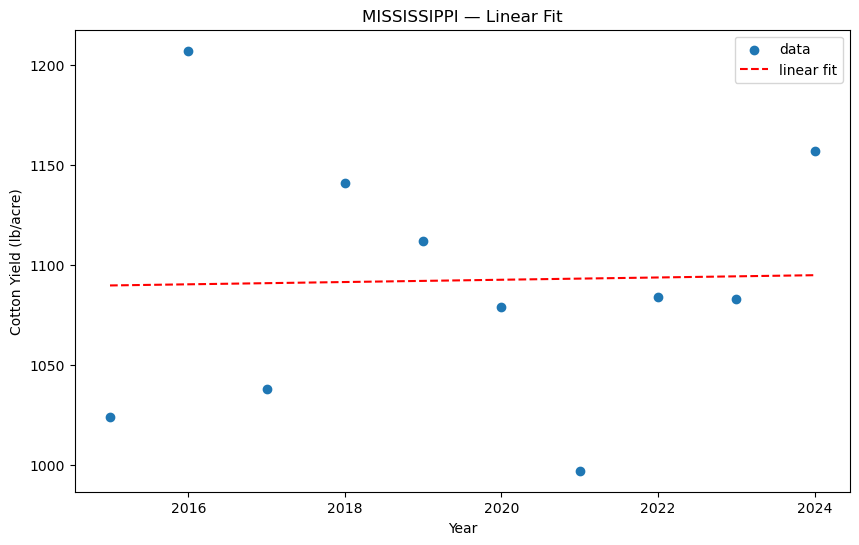

  → Prediction for 2025 upland: 1095.3

SOUTH CAROLINA  →  R² = 0.5478,   coeffs = [ 3.32666667e+01 -6.63653333e+04]


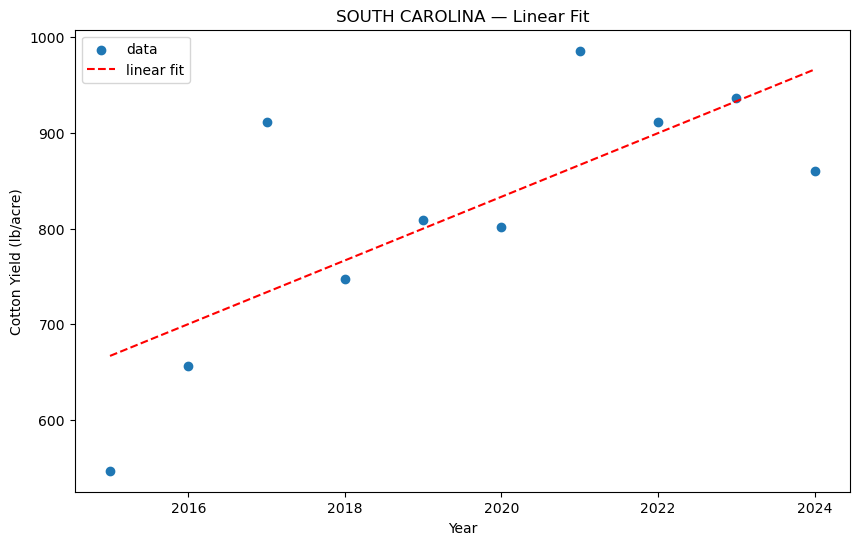

  → Prediction for 2025 upland: 999.7

NORTH CAROLINA  →  R² = 0.4007,   coeffs = [ 2.9369697e+01 -5.8428303e+04]


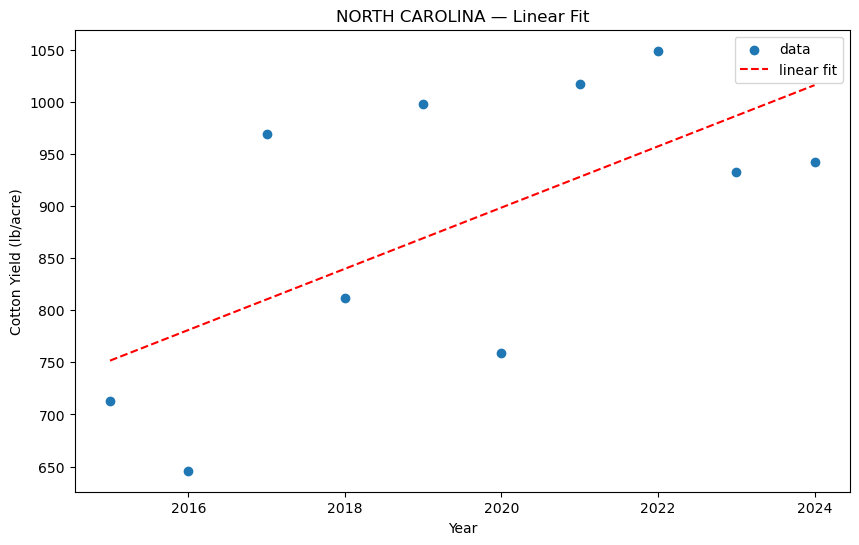

  → Prediction for 2025 upland: 1045.3

KANSAS  →  R² = 0.6949,   coeffs = [-4.80909091e+01  9.80266909e+04]


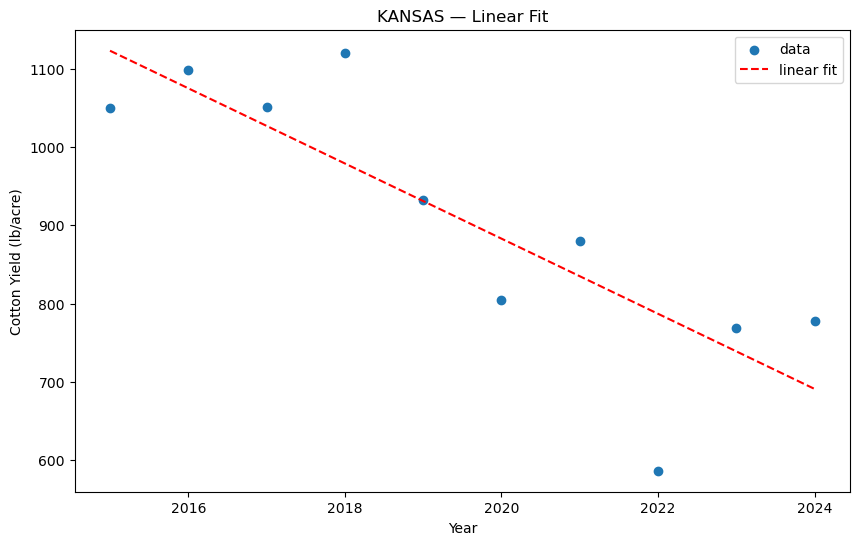

  → Prediction for 2025 upland: 642.6

NEW MEXICO  →  R² = 0.3213,   coeffs = [-3.12181818e+01  6.39794182e+04]


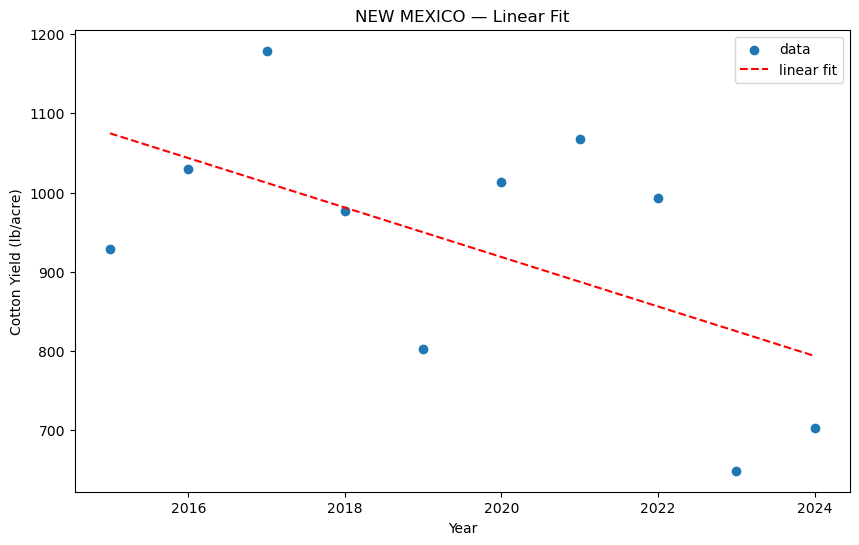

  → Prediction for 2025 upland: 762.6

CALIFORNIA  →  R² = 0.1479,   coeffs = [ 2.88121212e+01 -5.63822788e+04]


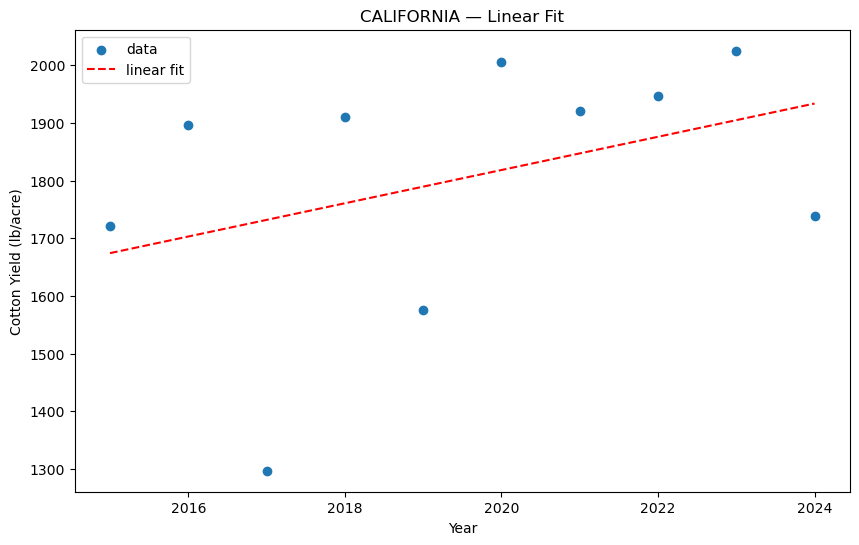

  → Prediction for 2025 upland: 1962.3

ARIZONA  →  R² = 0.1316,   coeffs = [-1.74424242e+01  3.65869758e+04]


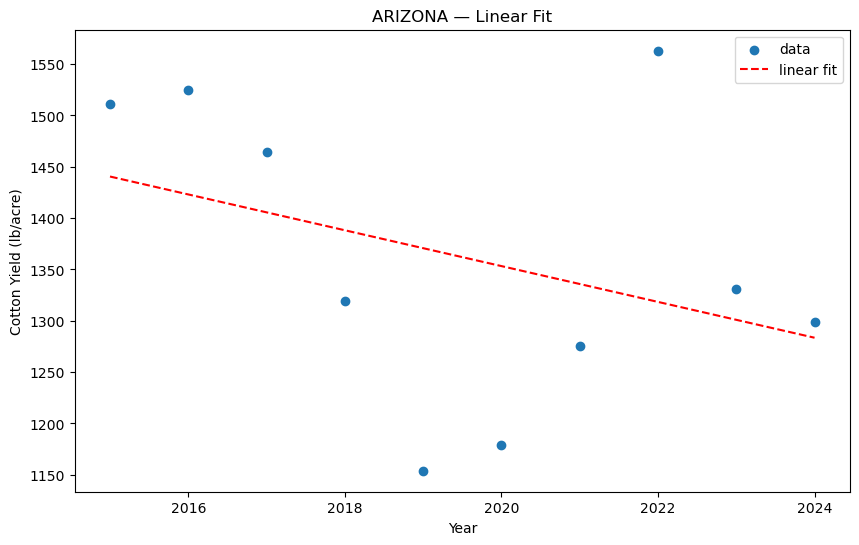

  → Prediction for 2025 upland: 1266.1



In [124]:
import numpy as np
import matplotlib.pyplot as plt
listofyields = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values('Year')
    # Use a numpy array for x
    x = np.arange(2015, 2025)                  # [2015, …, 2024]
    y = state_df['COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE'].values[:-1]

    # Fit a linear model (degree=1)
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state}  →  R² = {r2:.4f},   coeffs = {coeffs}")

    # Build a smooth curve for plotting
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, label='data')
    plt.plot(x_line, y_line, label='linear fit', color = 'r', linestyle = '--')
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Year")
    plt.ylabel("Cotton Yield (lb/acre)")
    plt.legend()
    plt.show()

    # 2025 prediction
    pred_2025 = model(2025)
    print(f"  → Prediction for 2025 upland: {pred_2025:.1f}\n")
    listofyields.append({state:pred_2025})

In [97]:
futures_prices = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx', sheet_name='FUTURES CLEAN', skiprows=1)
futures_prices.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
# ensure Date is datetime
futures_prices['Date'] = pd.to_datetime(futures_prices['Date'])
# extract year (no ())
futures_prices['Year'] = futures_prices['Date'].dt.year
futures_prices = futures_prices.groupby('Year').mean().reset_index()
futures_prices['ratio sum'] = futures_prices['SOY TO COTTON']+futures_prices['CORN TO COTTON']
futures_prices_2025_ratio = futures_prices.iloc[10]['ratio sum']
futures_prices_train = futures_prices[:-1]
x_train = futures_prices_train[['ratio sum']]
futures_prices = futures_prices[1:]
futures_prices = futures_prices[:-1]
x_train = futures_prices[['ratio sum']]
x_train

,ratio sum
1,22.977102
2,18.425310
3,17.380968
4,18.424300
5,20.923942
6,22.092657
7,19.009927
8,22.421900
9,21.149546


TENNESSEE R²: 0.8057
TENNESSEE coeffs: [-23902.21914054 795495.6388347 ]


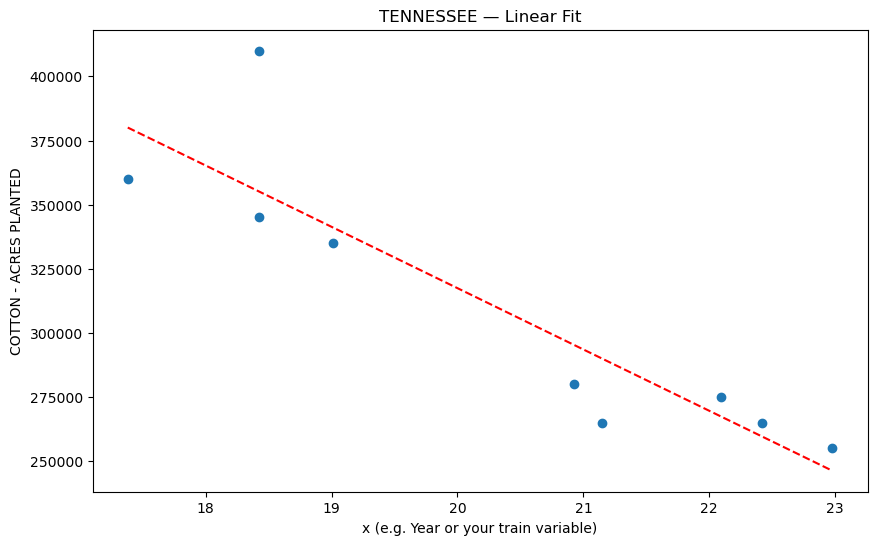

prediction: 281381.5827546992
predictionoosrate: 15   -46381.582755
Name: COTTON - ACRES PLANTED, dtype: float64
VIRGINIA R²: 0.6481
VIRGINIA coeffs: [ -4042.90039541 168340.56021731]


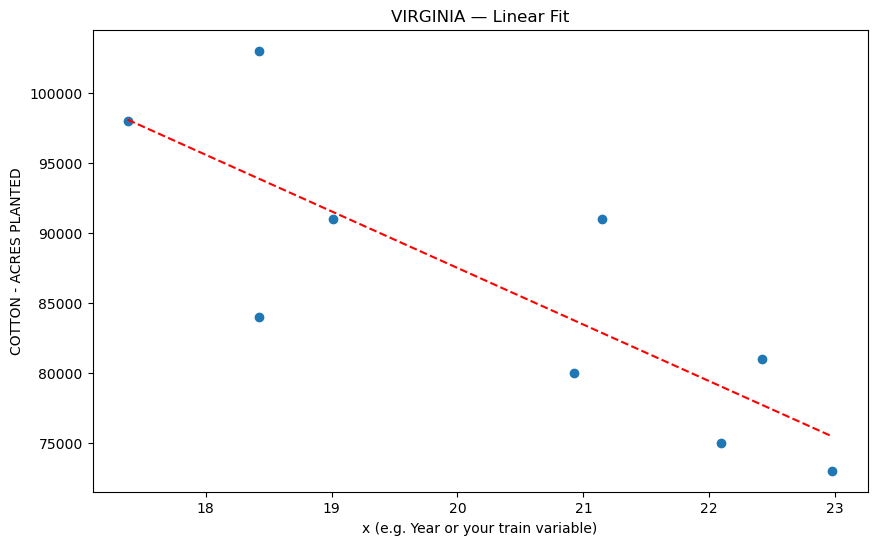

prediction: 81381.60848184985
predictionoosrate: 17    6618.391518
Name: COTTON - ACRES PLANTED, dtype: float64
GEORGIA R²: 0.7737
GEORGIA coeffs: [ -51375.16500659 2282407.83616566]


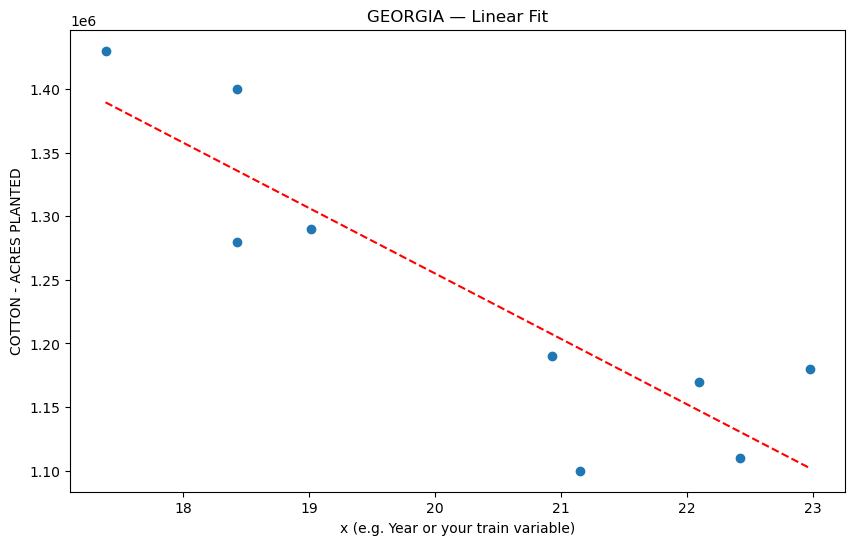

prediction: 1177376.779926955
predictionoosrate: 6   -177376.779927
Name: COTTON - ACRES PLANTED, dtype: float64
ARKANSAS R²: 0.0899
ARKANSAS coeffs: [-13682.88345926 804034.269923  ]


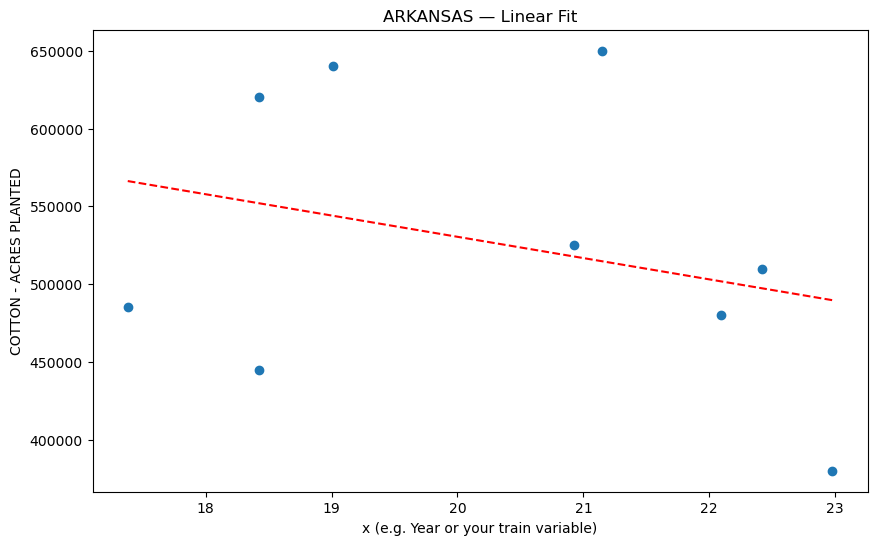

prediction: 509728.42858052964
predictionoosrate: 3    70271.571419
Name: COTTON - ACRES PLANTED, dtype: float64
US TOTAL R²: 0.9098
US TOTAL coeffs: [ -719546.34885377 26731848.81159195]


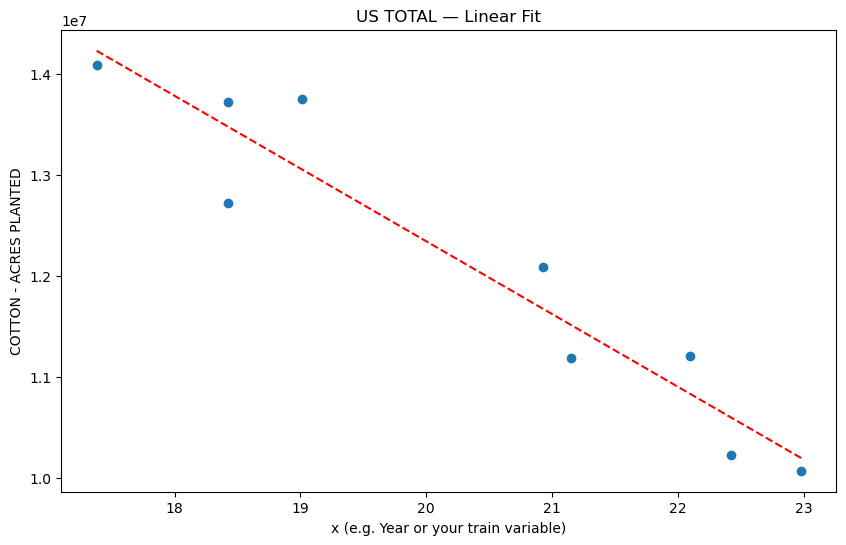

prediction: 11255089.529464072
predictionoosrate: 0   -1.388090e+06
Name: COTTON - ACRES PLANTED, dtype: float64
MISSOURI R²: 0.0791
MISSOURI coeffs: [ -5535.10102029 445205.30553408]


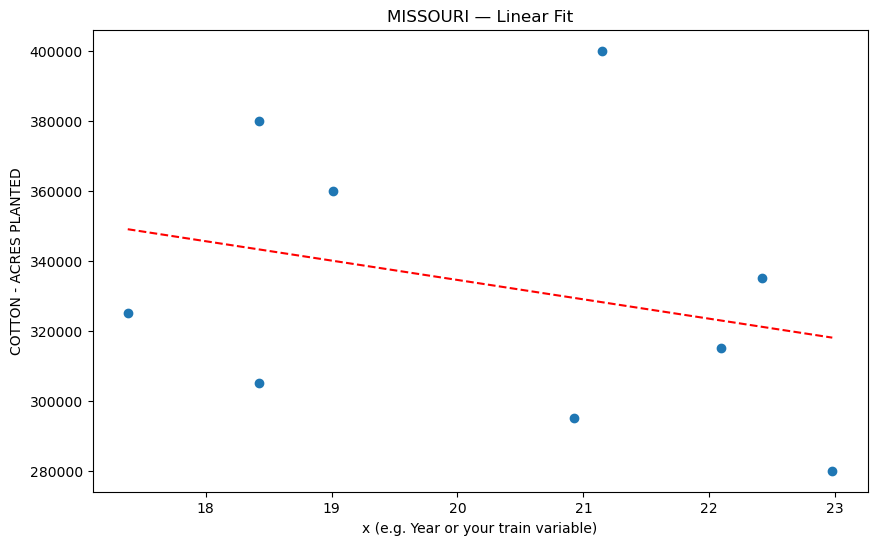

prediction: 326150.5341079681
predictionoosrate: 10   -6150.534108
Name: COTTON - ACRES PLANTED, dtype: float64
FLORIDA R²: 0.4991
FLORIDA coeffs: [ -3663.03985062 174513.82083015]


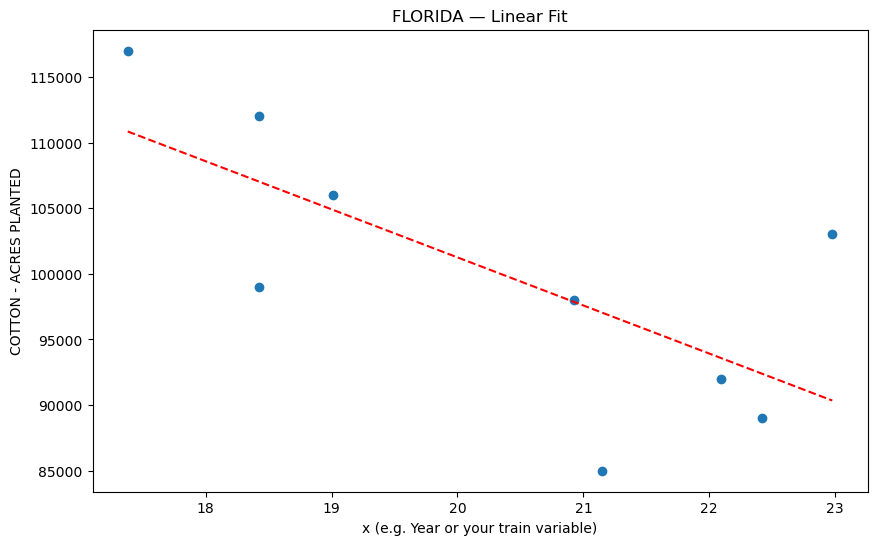

prediction: 95725.30901403903
predictionoosrate: 5   -30725.309014
Name: COTTON - ACRES PLANTED, dtype: float64
TEXAS R²: 0.7781
TEXAS coeffs: [ -366564.17974061 14130111.53388152]


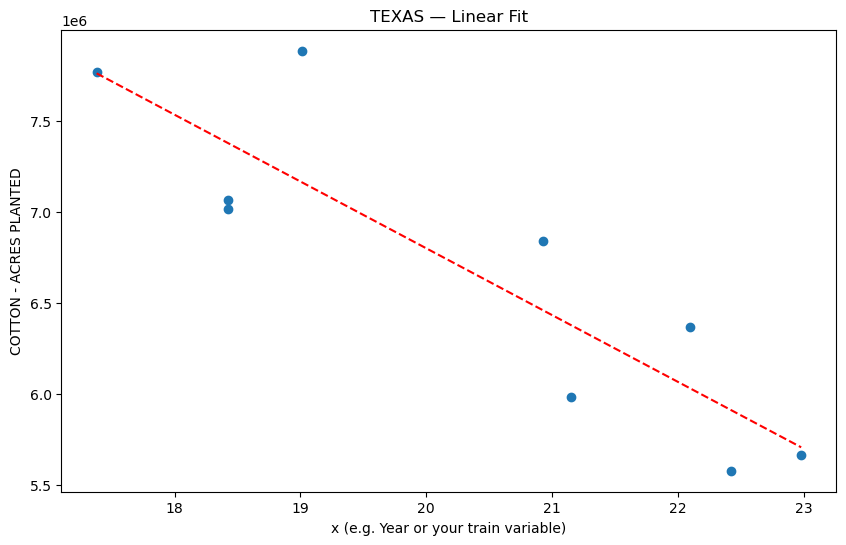

prediction: 6245663.811600003
predictionoosrate: 16   -718663.8116
Name: COTTON - ACRES PLANTED, dtype: float64
OKLAHOMA R²: 0.8792
OKLAHOMA coeffs: [ -64966.68346081 1854030.76838892]


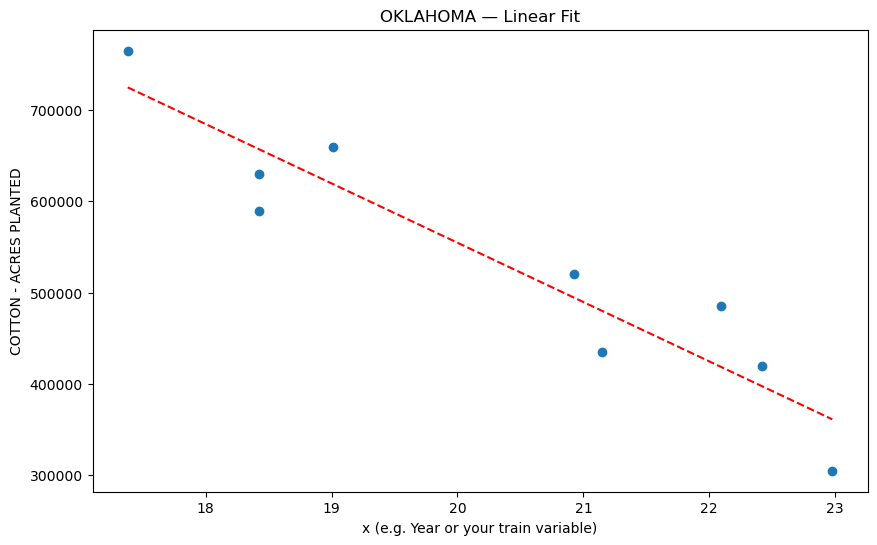

prediction: 456659.0453819956
predictionoosrate: 13   -126659.045382
Name: COTTON - ACRES PLANTED, dtype: float64
ALABAMA R²: 0.7185
ALABAMA coeffs: [-25518.9868364  951668.33577423]


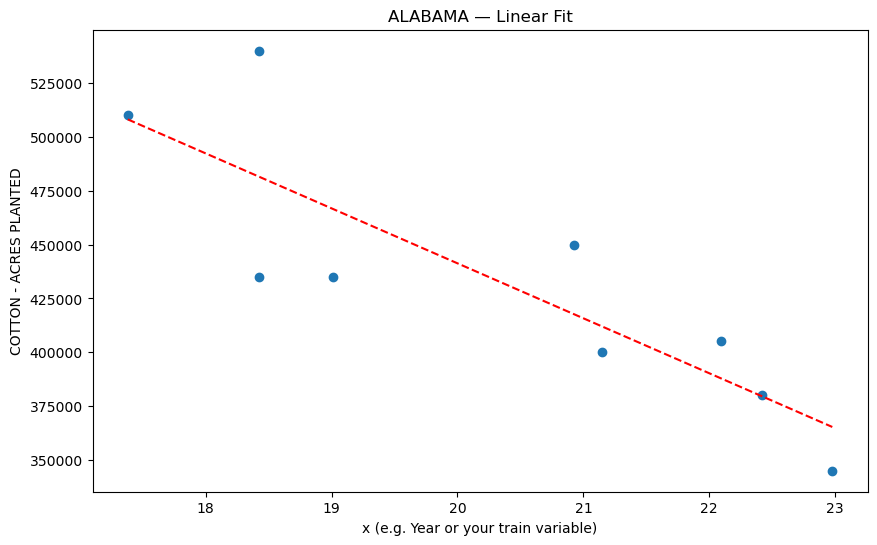

prediction: 402779.14049176127
predictionoosrate: 1   -42779.140492
Name: COTTON - ACRES PLANTED, dtype: float64
LOUISIANA R²: 0.6725
LOUISIANA coeffs: [-21458.44125406 611969.37112386]


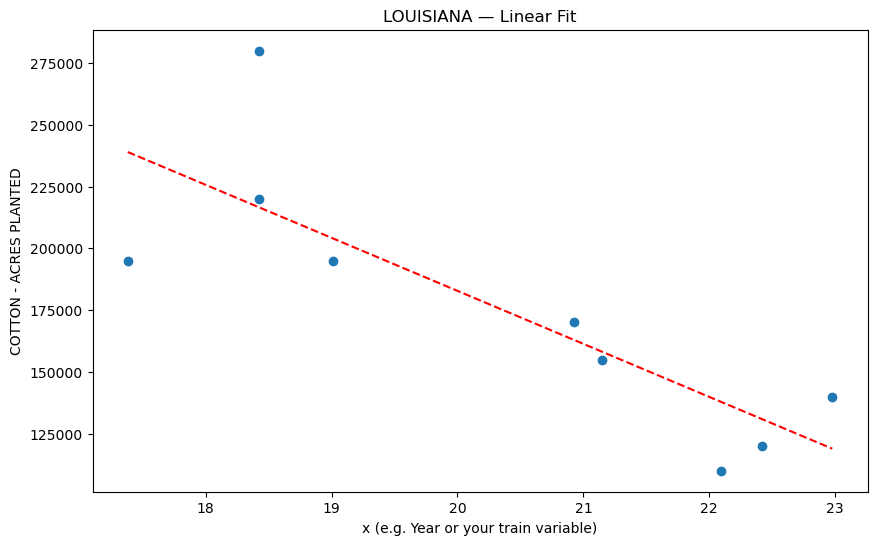

prediction: 150418.65880650363
predictionoosrate: 8   -40418.658807
Name: COTTON - ACRES PLANTED, dtype: float64
MISSISSIPPI R²: 0.7895
MISSISSIPPI coeffs: [ -44547.29767547 1440388.64306727]


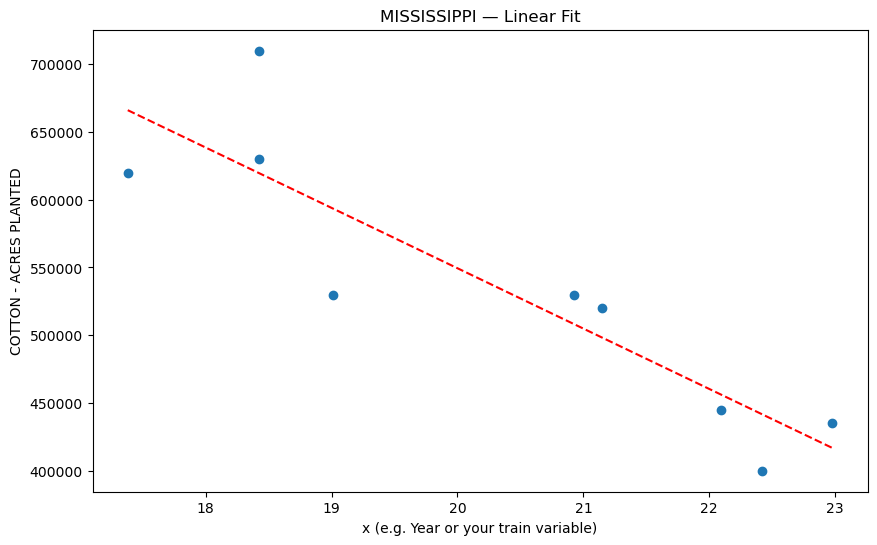

prediction: 482218.5350667257
predictionoosrate: 9   -122218.535067
Name: COTTON - ACRES PLANTED, dtype: float64
SOUTH CAROLINA R²: 0.8119
SOUTH CAROLINA coeffs: [-19276.70863946 629876.80971602]


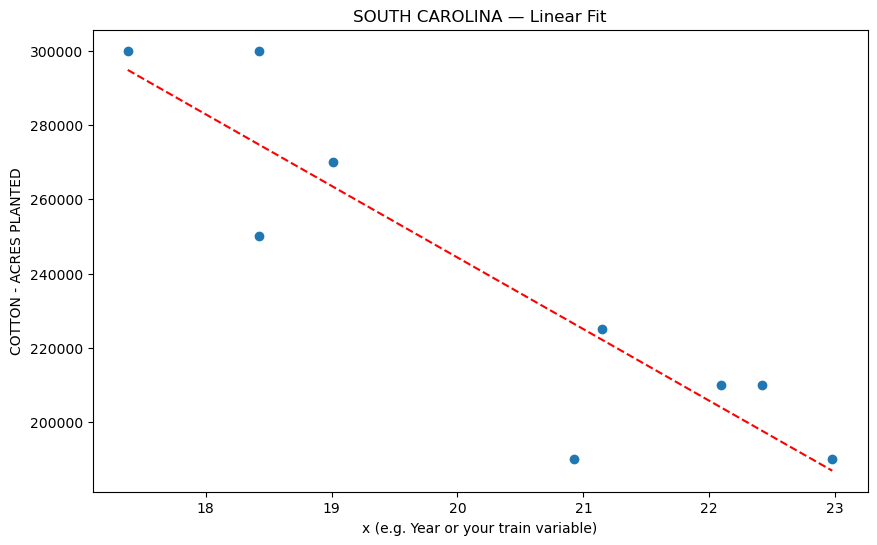

prediction: 215253.09598312626
predictionoosrate: 14   -35253.095983
Name: COTTON - ACRES PLANTED, dtype: float64
NORTH CAROLINA R²: 0.4908
NORTH CAROLINA coeffs: [-22950.1939822  865047.24110106]


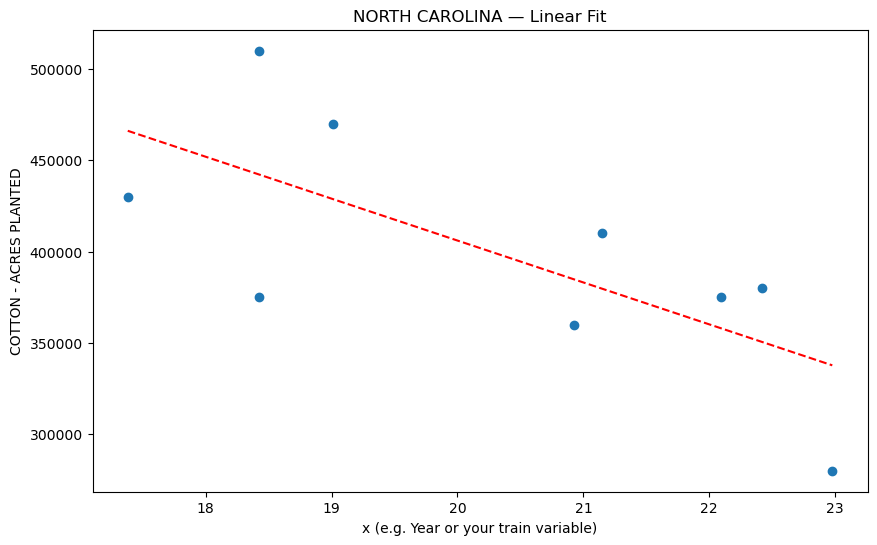

prediction: 371410.34292705375
predictionoosrate: 12   -81410.342927
Name: COTTON - ACRES PLANTED, dtype: float64
KANSAS R²: 0.2912
KANSAS coeffs: [-12927.16189762 392017.58407227]


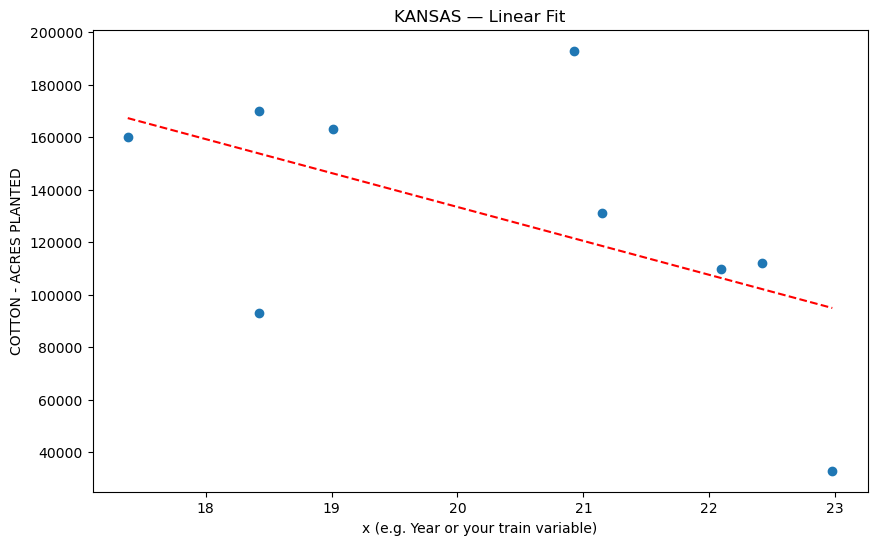

prediction: 113966.596517089
predictionoosrate: 7    26033.403483
Name: COTTON - ACRES PLANTED, dtype: float64
NEW MEXICO R²: 0.8095
NEW MEXICO coeffs: [ -6355.39623036 193366.92781716]


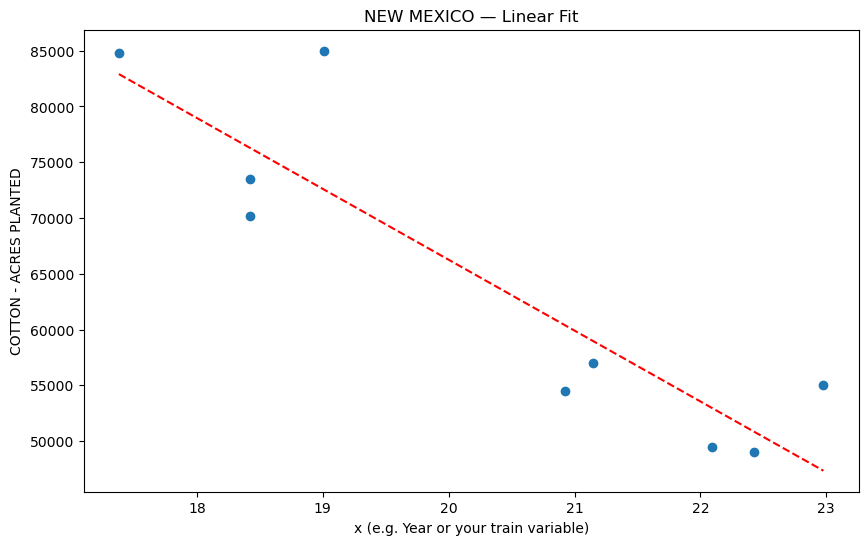

prediction: 56668.38469129117
predictionoosrate: 11   -25668.384691
Name: COTTON - ACRES PLANTED, dtype: float64
CALIFORNIA R²: 0.4152
CALIFORNIA coeffs: [-22679.34014481 653101.2841803 ]


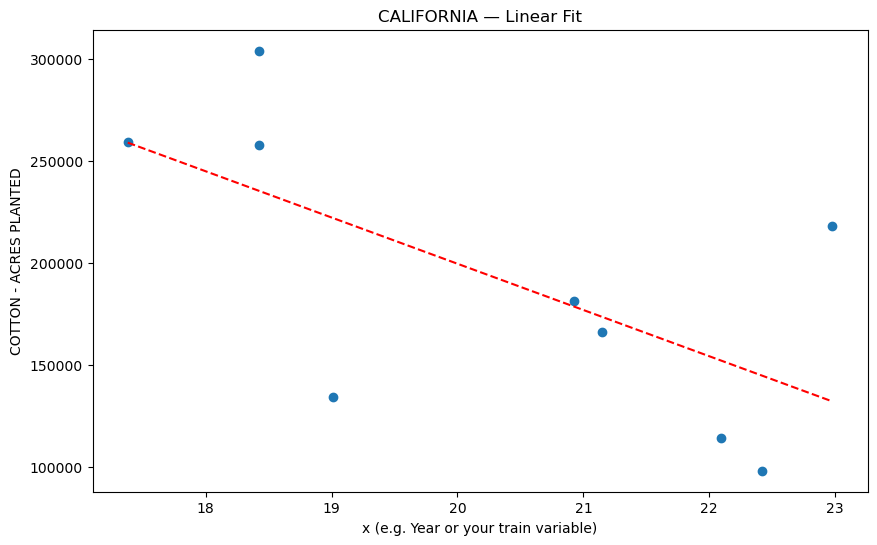

prediction: 165290.1950713602
predictionoosrate: 4   -48290.195071
Name: COTTON - ACRES PLANTED, dtype: float64
ARIZONA R²: 0.4328
ARIZONA coeffs: [-10100.65011926 340272.88096444]


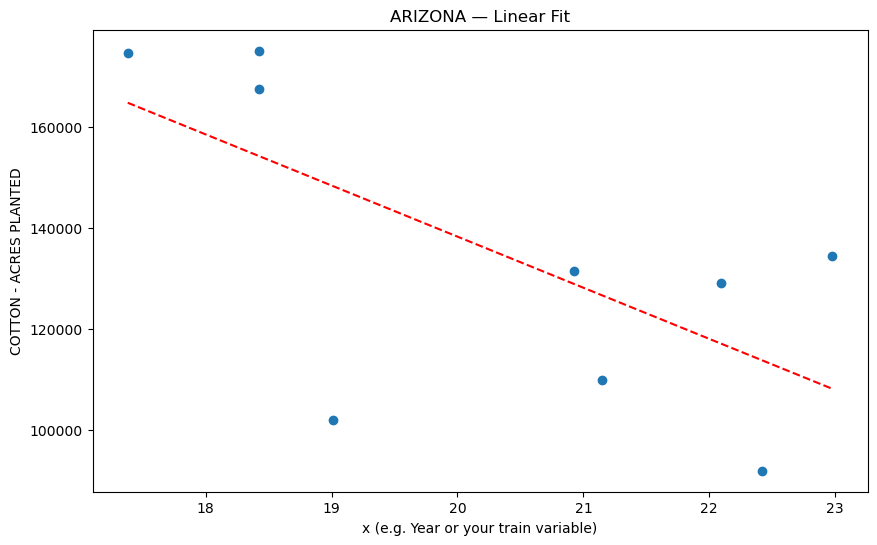

prediction: 123017.4800611194
predictionoosrate: 2    10982.519939
Name: COTTON - ACRES PLANTED, dtype: float64


In [123]:
listofplanted = []
for state in list_of_states:
    # Prepare x and y
    
    x = np.asarray(x_train).ravel()
    state_df = df[df['State'] == state].copy()
    state_df = state_df[state_df['Year'] != 2025]
    state_df = state_df[state_df['Year'] != 2015]
    state_df.sort_values('Year', inplace=True)
    y = state_df['COTTON - ACRES PLANTED'].values

    # Fit cubic
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state} R²: {r2:.4f}")
    print(f"{state} coeffs: {coeffs}")

    # Build a smooth x-axis for plotting the fitted curve
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure(figsize = (10,6))               # new figure per state
    plt.scatter(x, y)          # actual data
    plt.plot(x_line, y_line, color = 'r', linestyle ='--')   # fitted cubic curve
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("x (e.g. Year or your train variable)")
    plt.ylabel("COTTON - ACRES PLANTED")
    plt.show()
    
    state2025 = df[df['State'] == state].copy()
    state2025 = state2025[state2025['Year']==2025]
    prediction = coeffs[0]*futures_prices_2025_ratio + coeffs[1]
    predictionoosdiff = state2025['COTTON - ACRES PLANTED']-prediction
    print(f'prediction: {prediction}')
    print(f'predictionoosrate: {predictionoosdiff}')
    
    listofplanted.append({state:prediction})

In [99]:
print(listofplanted)
print('-------------')
print(listofabdrate)
print('-------------')
print(listofyields)

[{'TENNESSEE': 281381.5827546992}, {'VIRGINIA': 81381.60848184985}, {'GEORGIA': 1177376.779926955}, {'ARKANSAS': 509728.42858052964}, {'US TOTAL': 11255089.529464072}, {'MISSOURI': 326150.5341079681}, {'FLORIDA': 95725.30901403903}, {'TEXAS': 6245663.811600003}, {'OKLAHOMA': 456659.0453819956}, {'ALABAMA': 402779.14049176127}, {'LOUISIANA': 150418.65880650363}, {'MISSISSIPPI': 482218.5350667257}, {'SOUTH CAROLINA': 215253.09598312626}, {'NORTH CAROLINA': 371410.34292705375}, {'KANSAS': 113966.596517089}, {'NEW MEXICO': 56668.38469129117}, {'CALIFORNIA': 165290.1950713602}, {'ARIZONA': 123017.4800611194}]
-------------
[{'TENNESSEE': 0.023489498763474698}, {'VIRGINIA': 0.01180962500770344}, {'GEORGIA': 0.011886279573713993}, {'ARKANSAS': 0.013146629259122841}, {'US TOTAL': 0.21802858537416675}, {'MISSOURI': 0.03352928732881742}, {'FLORIDA': 0.026432874879575657}, {'TEXAS': 0.35128988395548355}, {'OKLAHOMA': 0.27390664083000404}, {'ALABAMA': 0.013598424487796898}, {'LOUISIANA': 0.0327169

In [100]:
listofproduction = []

for planted_dict in listofplanted:
    # unpack the one (state, planted) pair
    state, planted = next(iter(planted_dict.items()))
    
    # find the matching abandonment‐rate and yield
    abdrate = next(d[state] for d in listofabdrate  if state in d)
    yld     = next(d[state] for d in listofyields if state in d)
    
    # compute
    production = planted * (1 - abdrate) * yld / 480
    listofproduction.append({state: production})

print(listofproduction)


[{'TENNESSEE': 640104.4357031571}, {'VIRGINIA': 201833.17169597812}, {'GEORGIA': 2235471.118082099}, {'ARKANSAS': 1394573.0967561908}, {'US TOTAL': 16636633.91745972}, {'MISSOURI': 893152.774075342}, {'FLORIDA': 115704.19850482907}, {'TEXAS': 5518088.562855142}, {'OKLAHOMA': 394899.1159308074}, {'ALABAMA': 706921.6180489326}, {'LOUISIANA': 307989.7466854424}, {'MISSISSIPPI': 1087804.5631344644}, {'SOUTH CAROLINA': 432924.6000667345}, {'NORTH CAROLINA': 776775.4995295181}, {'KANSAS': 139283.28494170064}, {'NEW MEXICO': 62315.797442715615}, {'CALIFORNIA': 663846.7548578179}, {'ARIZONA': 320825.2294408436}]


In [101]:
uplandplanted = pd.DataFrame(
    [{'State': state, 'planted': planted}
     for entry in listofplanted for state, planted in entry.items()]
)
display(uplandplanted)

,State,planted
0,TENNESSEE,2.813816e+05
1,VIRGINIA,8.138161e+04
2,GEORGIA,1.177377e+06
3,ARKANSAS,5.097284e+05
4,US TOTAL,1.125509e+07
5,MISSOURI,3.261505e+05
6,FLORIDA,9.572531e+04
7,TEXAS,6.245664e+06
8,OKLAHOMA,4.566590e+05
9,ALABAMA,4.027791e+05


In [102]:
uplandabdrate = pd.DataFrame(
    [{'State': state, 'abandonment': abdrate}
     for entry in listofabdrate for state, abdrate in entry.items()]
)
display(uplandabdrate)

,State,abandonment
0,TENNESSEE,0.023489
1,VIRGINIA,0.011810
2,GEORGIA,0.011886
3,ARKANSAS,0.013147
4,US TOTAL,0.218029
5,MISSOURI,0.033529
6,FLORIDA,0.026433
7,TEXAS,0.351290
8,OKLAHOMA,0.273907
9,ALABAMA,0.013598


In [103]:
uplandyield = pd.DataFrame(
    [{'State': state, 'yield': yields}
     for entry in listofyields for state, yields in entry.items()]
)
display(uplandyield)

,State,yield
0,TENNESSEE,1118.200000
1,VIRGINIA,1204.666667
2,GEORGIA,922.333333
3,ARKANSAS,1330.733333
4,US TOTAL,907.333333
5,MISSOURI,1360.066667
6,FLORIDA,595.933333
7,TEXAS,653.733333
8,OKLAHOMA,571.666667
9,ALABAMA,854.066667


In [104]:
upland = uplandplanted.merge(uplandabdrate, on = 'State', how = 'inner')
upland = upland.merge(uplandyield, on = 'State', how = 'inner')
upland

,State,planted,abandonment,yield
0,TENNESSEE,2.813816e+05,0.023489,1118.200000
1,VIRGINIA,8.138161e+04,0.011810,1204.666667
2,GEORGIA,1.177377e+06,0.011886,922.333333
3,ARKANSAS,5.097284e+05,0.013147,1330.733333
4,US TOTAL,1.125509e+07,0.218029,907.333333
5,MISSOURI,3.261505e+05,0.033529,1360.066667
6,FLORIDA,9.572531e+04,0.026433,595.933333
7,TEXAS,6.245664e+06,0.351290,653.733333
8,OKLAHOMA,4.566590e+05,0.273907,571.666667
9,ALABAMA,4.027791e+05,0.013598,854.066667


In [111]:
#pima
pimaplanted = [{'TEXAS': 24991.79970051253}, {'CALIFORNIA': 130149.47831317352}, {'NEW MEXICO': 12353.063201978628}, {'ARIZONA': 12432.605558984696}]
pimaabdrate = [{'TEXAS': 0.35128988395548355}, {'CALIFORNIA': 0.017564707895993042}, {'NEW MEXICO': 0.3078475508356075}, {'ARIZONA': 0.011250334310022939}]
pimayield = [{'TEXAS': 630.3999999999796}, {'CALIFORNIA': 1369.1333333333241}, {'NEW MEXICO': 695.7333333333154}, {'ARIZONA': 997.1333333333387}]

In [112]:
dfpimayield = pd.DataFrame(
    [{'State': state, 'yield': yields}
     for entry in pimayield for state, yields in entry.items()]
)
dfpimayield

,State,yield
0,TEXAS,630.400000
1,CALIFORNIA,1369.133333
2,NEW MEXICO,695.733333
3,ARIZONA,997.133333


In [113]:
dfpimaplanted = pd.DataFrame(
    [{'State': state, 'planted': yields}
     for entry in pimaplanted for state, yields in entry.items()]
)
dfpimaplanted

,State,planted
0,TEXAS,24991.799701
1,CALIFORNIA,130149.478313
2,NEW MEXICO,12353.063202
3,ARIZONA,12432.605559


In [114]:
dfpimaabdrate = pd.DataFrame(
    [{'State': state, 'abd rate': yields}
     for entry in pimaabdrate for state, yields in entry.items()]
)
dfpimaabdrate

,State,abd rate
0,TEXAS,0.351290
1,CALIFORNIA,0.017565
2,NEW MEXICO,0.307848
3,ARIZONA,0.011250


In [115]:
pima = dfpimaplanted.merge(dfpimaabdrate, on = 'State', how = 'inner')
pima = pima.merge(dfpimayield, on = 'State', how = 'inner')
pima

,State,planted,abd rate,yield
0,TEXAS,24991.799701,0.351290,630.400000
1,CALIFORNIA,130149.478313,0.017565,1369.133333
2,NEW MEXICO,12353.063202,0.307848,695.733333
3,ARIZONA,12432.605559,0.011250,997.133333


In [116]:
pima.to_csv('pima pred v1.1.csv')
upland.to_csv('upland pred v1.1.csv')